# Deep Leaning Assignment 3

## Google Stock Price Prediction using RNN-LSTM

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as plt

In [26]:
df = pd.read_csv('D:/Assigment 3 DL/GOOGL.csv')

In [27]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...,...
3927,2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
3928,2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
3929,2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800
3930,2020-03-31,1148.729980,1173.400024,1136.719971,1161.949951,1161.949951,3261400


In [28]:
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094800
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211700
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196700
8,2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917800
9,2004-09-01,51.401402,51.536537,49.884884,50.175175,50.175175,9138200


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


## Spliting the Data into Training and Validation Dataset

In [33]:
# spliting the data into 75 and 25 percent.
train = round(len(df) * 0.75)  
validation = len(df) - train

print("Training data :", train)
print("Validation data  :", validation)

Training data : 2949
Validation data  : 983


In [34]:
train_data = data[:train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  
train_data

,Date,Open
0,2004-08-19,50.050049
1,2004-08-20,50.555557
2,2004-08-23,55.430431
3,2004-08-24,55.675674
4,2004-08-25,52.532532
...,...,...
2944,2016-04-29,704.119995
2945,2016-05-02,711.919983
2946,2016-05-03,712.500000
2947,2016-05-04,706.770020


In [35]:
validation_data = data[train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
2949,2016-05-06,712.200012
2950,2016-05-09,726.700012
2951,2016-05-10,734.960022
2952,2016-05-11,740.520020
2953,2016-05-12,732.000000
...,...,...
3927,2020-03-26,1114.719971
3928,2020-03-27,1127.469971
3929,2020-03-30,1132.640015
3930,2020-03-31,1148.729980


## Creating Train Dataset

In [38]:
dataset_train = train_data.Open.values
dataset_train.shape

(2949,)

In [40]:
# Converting the data to 2D Array

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2949, 1)

In [163]:
dataset_train

array([[ 50.05004883],
       [ 50.55555725],
       [ 55.43043137],
       ...,
       [712.5       ],
       [706.77001953],
       [715.        ]])

## Normalizing the Data from 0 to 1

In [46]:
# Generaling our data values from (0 to 1) for better perspective using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))



norm_data = sc.fit_transform(dataset_train)

norm_data.shape

(2949, 1)

In [47]:
norm_data

array([[5.39921750e-04],
       [1.21316517e-03],
       [7.70559288e-03],
       ...,
       [8.82800330e-01],
       [8.75169059e-01],
       [8.86129866e-01]])

In [48]:
# here we can see the values are in between 0 and 1.

In [50]:
import matplotlib.pyplot as plt

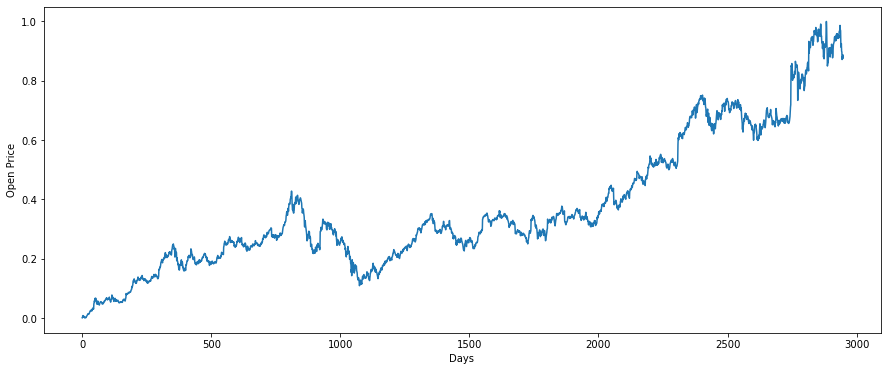

In [51]:
plt.subplots(figsize = (15,6))
plt.plot(norm_data)
plt.xlabel("Days ")
plt.ylabel("Open Price")
plt.show()

In [52]:
# As I am using RNN i need to have a time stamp

In [56]:
X_train = []
Y_train = []



for i in range(50, train):
    X_train.append(dataset_train_scaled[i-50:i,0])
    Y_train.append(dataset_train_scaled[i,0])
    
# List to array Convertion using numpy
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [57]:
X_train.shape

(2899, 50)

In [58]:
Y_train.shape

(2899,)

In [59]:
# Reshape the Data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))


In [60]:
X_train.shape

(2899, 50, 1)

In [61]:
Y_train.shape

(2899, 1)

In [62]:
X_train[1]

array([[0.00121317],
       [0.00770559],
       [0.00803221],
       [0.00384613],
       [0.00383946],
       [0.00593917],
       [0.00405943],
       [0.00207304],
       [0.00233967],
       [0.        ],
       [0.00117317],
       [0.00121317],
       [0.00103319],
       [0.00222635],
       [0.00160644],
       [0.00495931],
       [0.0055059 ],
       [0.00757894],
       [0.00876544],
       [0.01015192],
       [0.01183835],
       [0.01374475],
       [0.01213831],
       [0.01309818],
       [0.01449798],
       [0.01357811],
       [0.01473795],
       [0.01833744],
       [0.02047048],
       [0.02107039],
       [0.02403665],
       [0.02364337],
       [0.02556977],
       [0.02514982],
       [0.02634966],
       [0.02520315],
       [0.02349672],
       [0.0294159 ],
       [0.02787612],
       [0.03048908],
       [0.02933591],
       [0.0342019 ],
       [0.03255546],
       [0.0301358 ],
       [0.04756004],
       [0.05146617],
       [0.0580919 ],
       [0.055

In [63]:
X_train[0]

array([[0.00053992],
       [0.00121317],
       [0.00770559],
       [0.00803221],
       [0.00384613],
       [0.00383946],
       [0.00593917],
       [0.00405943],
       [0.00207304],
       [0.00233967],
       [0.        ],
       [0.00117317],
       [0.00121317],
       [0.00103319],
       [0.00222635],
       [0.00160644],
       [0.00495931],
       [0.0055059 ],
       [0.00757894],
       [0.00876544],
       [0.01015192],
       [0.01183835],
       [0.01374475],
       [0.01213831],
       [0.01309818],
       [0.01449798],
       [0.01357811],
       [0.01473795],
       [0.01833744],
       [0.02047048],
       [0.02107039],
       [0.02403665],
       [0.02364337],
       [0.02556977],
       [0.02514982],
       [0.02634966],
       [0.02520315],
       [0.02349672],
       [0.0294159 ],
       [0.02787612],
       [0.03048908],
       [0.02933591],
       [0.0342019 ],
       [0.03255546],
       [0.0301358 ],
       [0.04756004],
       [0.05146617],
       [0.058

In [64]:
Y_train[0]

array([0.06645741])

## Creating RNN Model using KERAS

In [65]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


In [66]:
# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [67]:
# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [68]:
# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

In [69]:
# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

In [71]:
# Fit the RNN Module

history = regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)

Epoch 1/50
91/91 [==============================] - 3s 13ms/step - loss: 0.2692 - accuracy: 0.0000e+00
Epoch 2/50
91/91 [==============================] - 1s 13ms/step - loss: 0.1322 - accuracy: 3.4495e-04
Epoch 3/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0689 - accuracy: 3.4495e-04
Epoch 4/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0475 - accuracy: 3.4495e-04
Epoch 5/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0333 - accuracy: 3.4495e-04
Epoch 6/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0238 - accuracy: 3.4495e-04
Epoch 7/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0177 - accuracy: 3.4495e-04
Epoch 8/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 3.4495e-04
Epoch 9/50
91/91 [==============================] - 1s 13ms/step - loss: 0.0107 - accuracy: 3.4495e-04
Epoch 10/50
91/91 [==============================] - 1s 13ms/step - loss:

In [72]:
history.history["loss"]

[0.2692491114139557,
 0.13217952847480774,
 0.06893718242645264,
 0.04748193919658661,
 0.03330625966191292,
 0.02382843568921089,
 0.017736712470650673,
 0.013425459153950214,
 0.010696216486394405,
 0.008682864718139172,
 0.007562092039734125,
 0.0061865197494626045,
 0.005604797042906284,
 0.005407555028796196,
 0.00447643781080842,
 0.0040794904343783855,
 0.0035777795128524303,
 0.003415351267904043,
 0.003000905504450202,
 0.003043130738660693,
 0.002819260349497199,
 0.002690711757168174,
 0.0026009625289589167,
 0.002439690288156271,
 0.0024177427403628826,
 0.002288863994181156,
 0.002185091143473983,
 0.0019266873132437468,
 0.0020687254145741463,
 0.0017535659717395902,
 0.0017385529354214668,
 0.0018324931152164936,
 0.0016353551764041185,
 0.0016273893415927887,
 0.0015396359376609325,
 0.0013848650269210339,
 0.001426094793714583,
 0.001533106667920947,
 0.0014082486741244793,
 0.0014083095593377948,
 0.0013366368366405368,
 0.0013096658512949944,
 0.0011876662028953433,


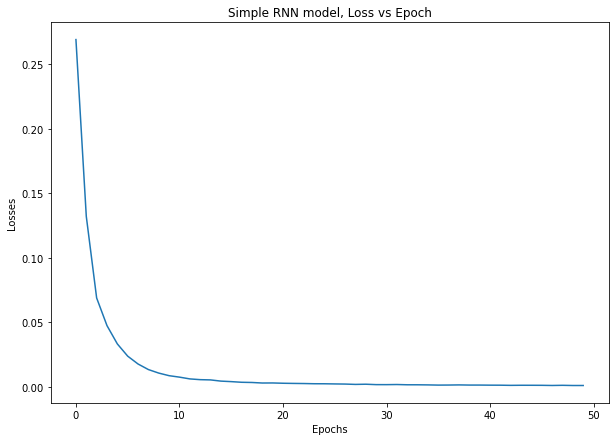

In [73]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

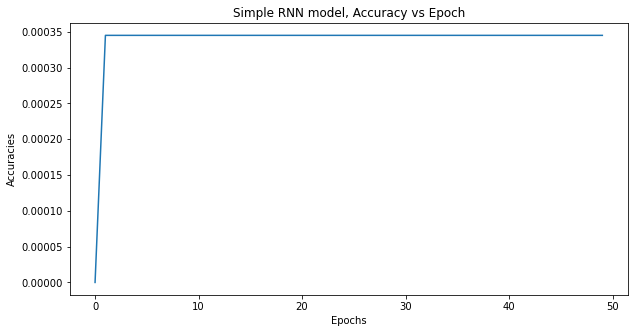

In [74]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Creating a Validation Data

In [79]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  sc.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (983, 1)


## Creating X_test and Y_test

In [81]:
X_test = []
Y_test = []

for i in range(50, length_validation):
    X_test.append(scaled_dataset_validation[i-50:i,0])
    Y_test.append(scaled_dataset_validation[i,0])

In [83]:
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [85]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of Y_test before reshape :",Y_test.shape)

Shape of X_test before reshape : (933, 50)
Shape of y_test before reshape : (933,)


## Reshape the Test Data like Train Data

In [86]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
Y_test = np.reshape(Y_test, (-1,1))  # reshape to 2D array

In [87]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of Y_test after reshape :",Y_test.shape)

Shape of X_test after reshape : (933, 50, 1)
Shape of Y_test after reshape : (933, 1)


## Evaluation of the Validation Data

In [89]:
# predictions with X_test data
test = regressor.predict(X_test)
# scaling back from 0-1 to original
test = sc.inverse_transform(test) 
print("Shape of Y-prediction Test is :",test.shape)

30/30 [==============================] - 0s 4ms/step
Shape of Y-prediction Test is : (933, 1)


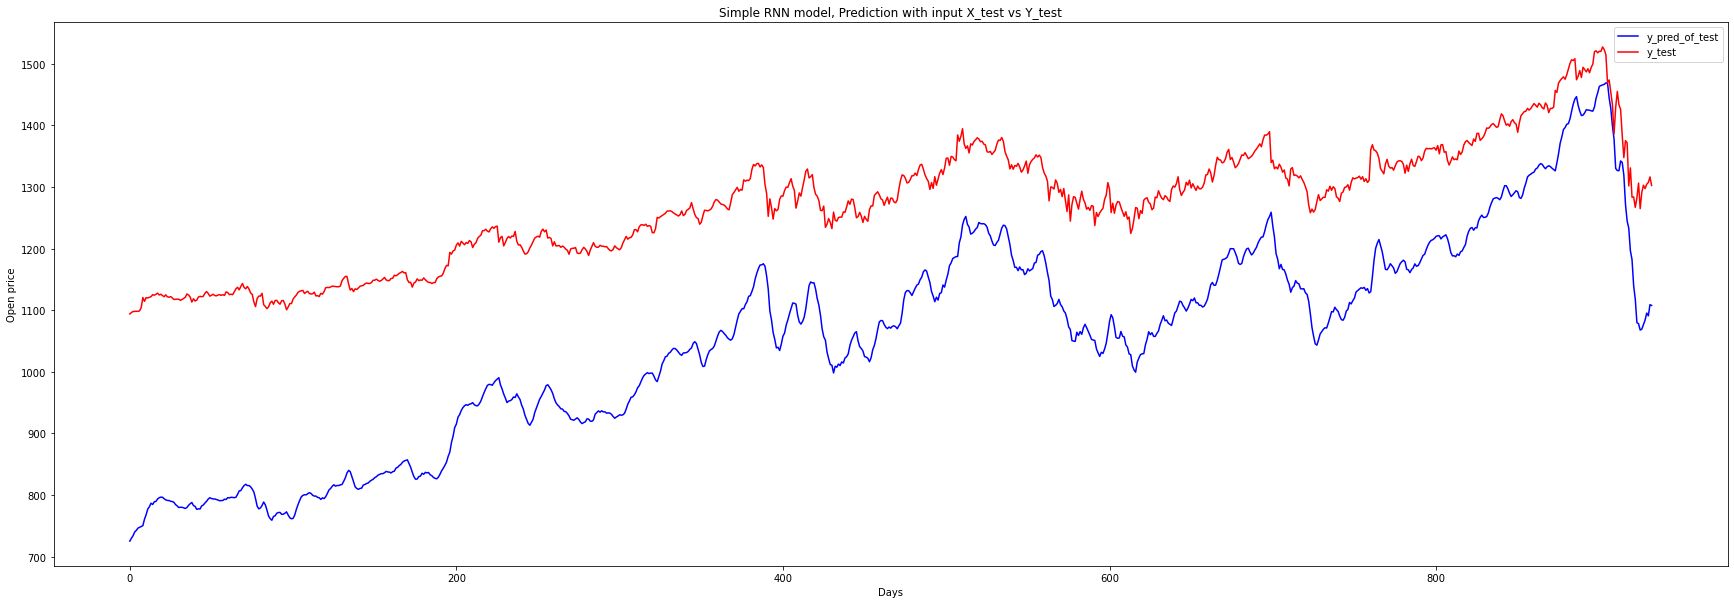

In [170]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(test, label = "y_pred_of_test", c = "blue")
plt.plot(sc.inverse_transform(Y_test), label = "y_test", c = "red")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs Y_test")
plt.legend()
plt.show()

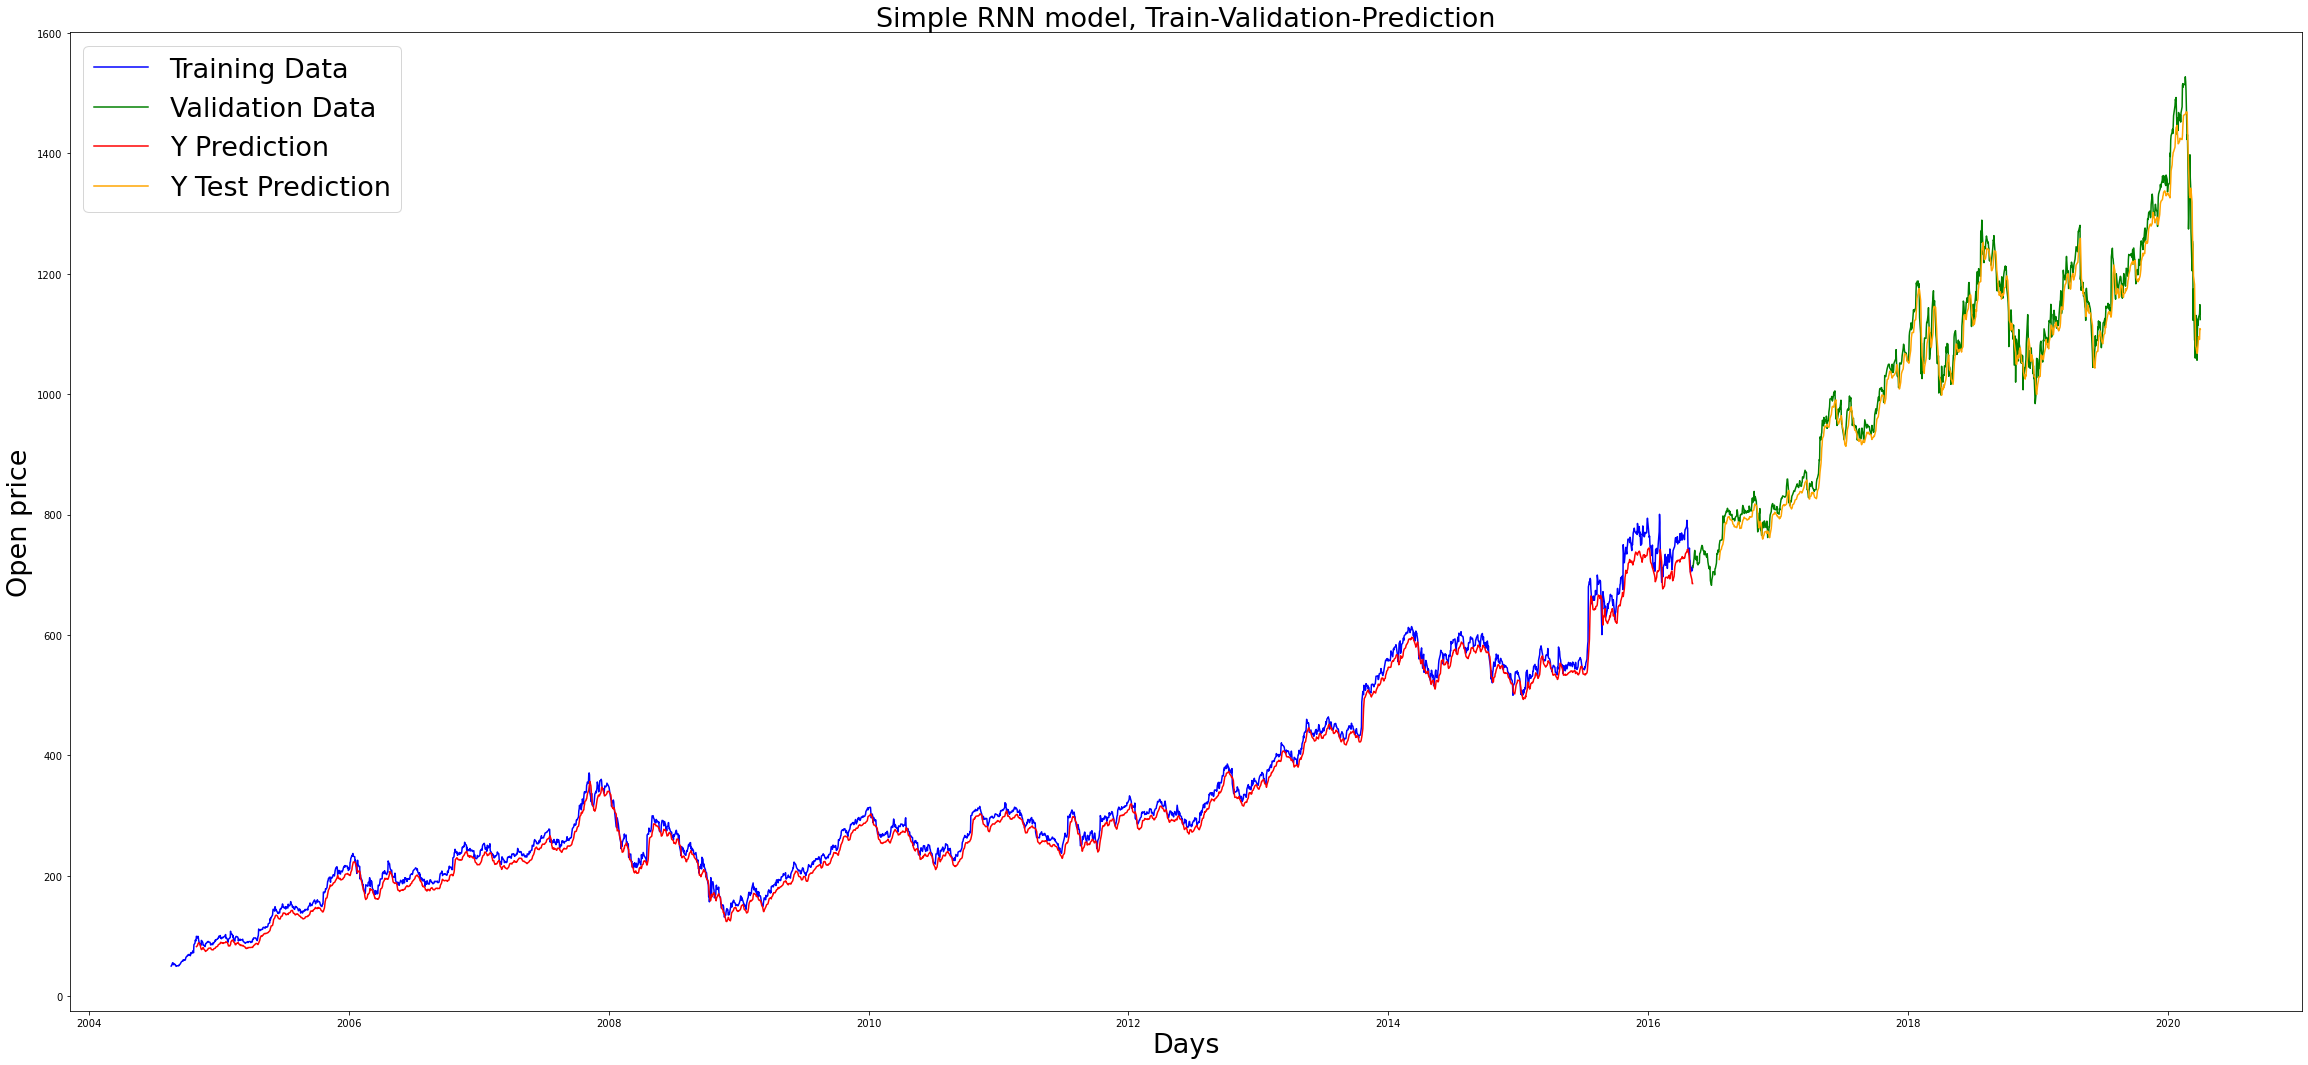

In [165]:
# Visualisation
plt.subplots(figsize =(40,18))
plt.plot(train_data.Date, train_data.Open, label = "Training Data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "Validation Data", color = "g")
plt.plot(train_data.Date.iloc[50:], Y_pred, label = "Y Prediction", color = "r")
plt.plot(validation_data.Date.iloc[50:], test, label = "Y Test Prediction", color = "orange")
plt.xlabel("Days",fontsize = 27)
plt.ylabel("Open price",fontsize = 27)
plt.title("Simple RNN model, Train-Validation-Prediction", fontsize = 27)
plt.legend(fontsize = 27)
plt.show()


## Creating a LSTM Model

In [112]:
Y_train = sc.fit_transform(Y_train)

In [137]:
# Creating a LSTM model using Keras

from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 10, batch_size = 50)

Epoch 1/10
58/58 [==============================] - 4s 26ms/step - loss: 0.0182 - accuracy: 3.4495e-04
Epoch 2/10
58/58 [==============================] - 1s 25ms/step - loss: 4.3067e-04 - accuracy: 6.8989e-04
Epoch 3/10
58/58 [==============================] - 1s 25ms/step - loss: 4.0538e-04 - accuracy: 6.8989e-04
Epoch 4/10
58/58 [==============================] - 1s 25ms/step - loss: 4.0360e-04 - accuracy: 6.8989e-04
Epoch 5/10
58/58 [==============================] - 1s 24ms/step - loss: 3.9282e-04 - accuracy: 6.8989e-04
Epoch 6/10
58/58 [==============================] - 1s 24ms/step - loss: 3.8321e-04 - accuracy: 6.8989e-04
Epoch 7/10
58/58 [==============================] - 1s 24ms/step - loss: 4.0600e-04 - accuracy: 6.8989e-04
Epoch 8/10
58/58 [==============================] - 1s 24ms/step - loss: 4.2255e-04 - accuracy: 6.8989e-04
Epoch 9/10
58/58 [==============================] - 1s 24ms/step - loss: 3.8139e-04 - accuracy: 6.8989e-04
Epoch 10/10
58/58 [======================

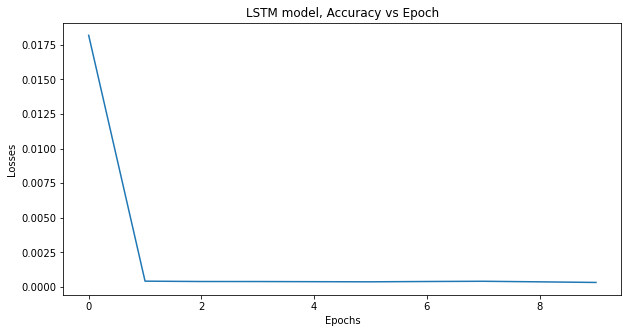

In [138]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 7ms/step


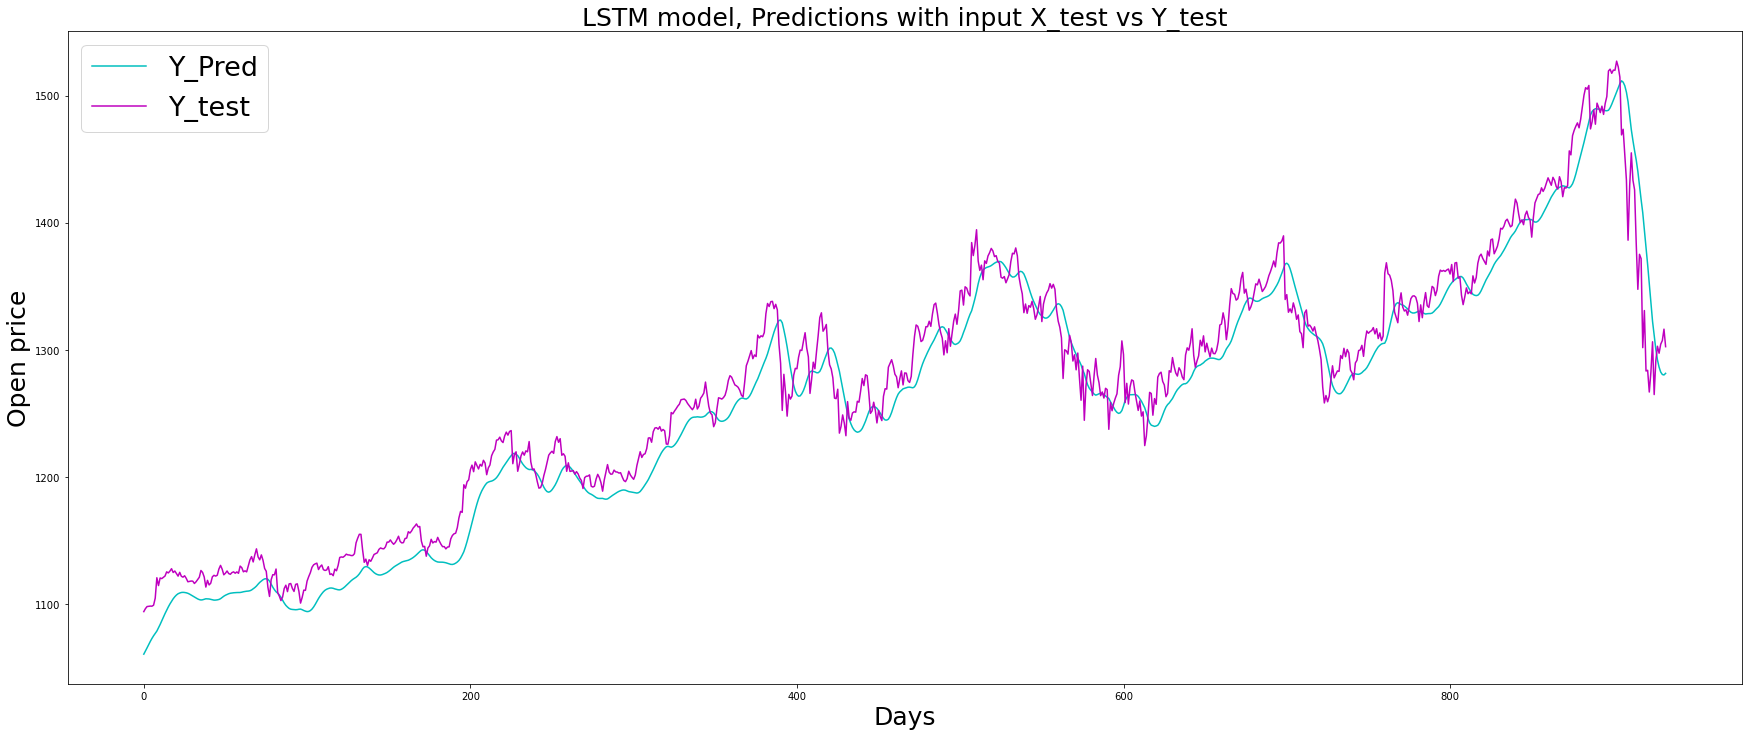

In [139]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()


In [140]:
data.iloc[-1]

Date          2020-04-01
Open              1124.0
High         1129.420044
Low           1093.48999
Close        1102.099976
Adj Close    1102.099976
Volume           2597100
Name: 3931, dtype: object

In [141]:
X_input = data.iloc[-50:].Open.values               # getting last 50 rows and converting to array
X_input = sc.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.92041719],
        [0.91578721],
        [0.92698   ],
        [0.79682705],
        [0.81849082],
        [0.85400251],
        [0.81075976],
        [0.87396731],
        [0.86077792],
        [0.84557066],
        [0.8649407 ],
        [0.84023962],
        [0.87296914],
        [0.89386833],
        [0.97041409],
        [0.97591494],
        [0.96346887],
        [0.97309024],
        [0.97268656],
        [1.        ],
        [0.98260531],
        [0.95195719],
        [0.77879508],
        [0.79568005],
        [0.71917681],
        [0.64305598],
        [0.46288487],
        [0.62659569],
        [0.72491152],
        [0.64267356],
        [0.61419213],
        [0.4536244 ],
        [0.31559157],
        [0.42057651],
        [0.4075782 ],
        [0.14070897],
        [0.25193808],
        [0.07059872],
        [0.0727864 ],
        [0.00758224],
        [0.06764645],
        [0.158295  ],
        [0.        ],
        [0.10111928],
        [0.14487175],
        [0

In [142]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", RNN[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM[0,0])

1/1 [==============================] - 0s 13ms/step
Simple RNN, Open price prediction for 3/18/2017      : 1121.74
LSTM prediction, Open price prediction for 3/18/2017 : 1089.3345


In [143]:
# Creating a LSTM model using Keras

from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 20, batch_size = 50)

Epoch 1/20
58/58 [==============================] - 4s 29ms/step - loss: 0.0142 - accuracy: 6.8989e-04
Epoch 2/20
58/58 [==============================] - 2s 29ms/step - loss: 4.0744e-04 - accuracy: 6.8989e-04
Epoch 3/20
58/58 [==============================] - 2s 29ms/step - loss: 4.0580e-04 - accuracy: 6.8989e-04
Epoch 4/20
58/58 [==============================] - 2s 30ms/step - loss: 3.8049e-04 - accuracy: 6.8989e-04
Epoch 5/20
58/58 [==============================] - 2s 29ms/step - loss: 3.8903e-04 - accuracy: 6.8989e-04
Epoch 6/20
58/58 [==============================] - 2s 28ms/step - loss: 3.7484e-04 - accuracy: 6.8989e-04
Epoch 7/20
58/58 [==============================] - 2s 28ms/step - loss: 3.7213e-04 - accuracy: 6.8989e-04
Epoch 8/20
58/58 [==============================] - 2s 29ms/step - loss: 3.4362e-04 - accuracy: 6.8989e-04
Epoch 9/20
58/58 [==============================] - 2s 28ms/step - loss: 3.3124e-04 - accuracy: 6.8989e-04
Epoch 10/20
58/58 [======================

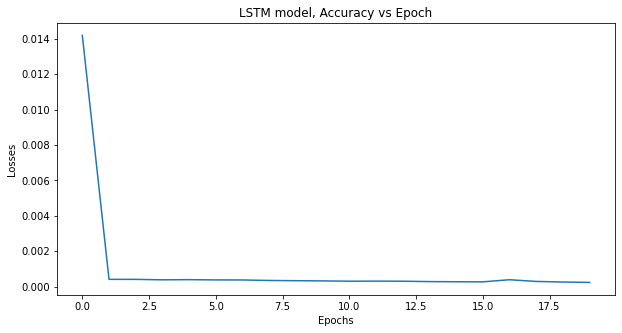

In [144]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 8ms/step


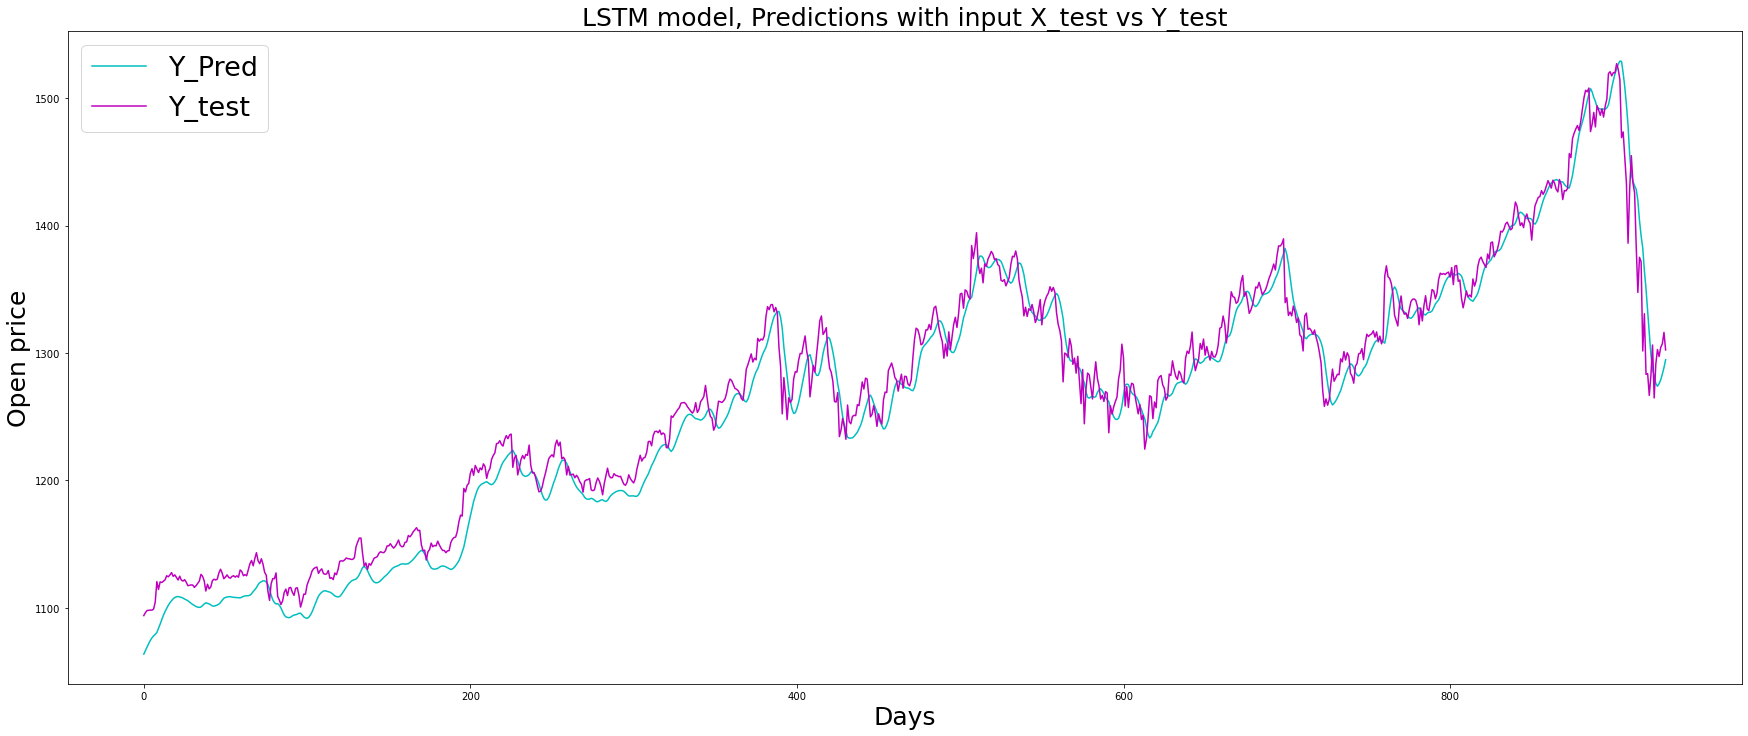

In [145]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [146]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 15ms/step
Simple RNN, Open price prediction for 3/18/2017      : 1121.74
LSTM prediction, Open price prediction for 3/18/2017 : 1103.5892


In [151]:
# Creating a LSTM model using Keras

from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 50, batch_size = 50)

Epoch 1/50
58/58 [==============================] - 9s 60ms/step - loss: 0.0097 - accuracy: 6.8989e-04
Epoch 2/50
58/58 [==============================] - 3s 60ms/step - loss: 4.3579e-04 - accuracy: 6.8989e-04
Epoch 3/50
58/58 [==============================] - 3s 60ms/step - loss: 4.5651e-04 - accuracy: 6.8989e-04
Epoch 4/50
58/58 [==============================] - 3s 60ms/step - loss: 4.0435e-04 - accuracy: 6.8989e-04
Epoch 5/50
58/58 [==============================] - 3s 60ms/step - loss: 4.5209e-04 - accuracy: 6.8989e-04
Epoch 6/50
58/58 [==============================] - 3s 59ms/step - loss: 3.8554e-04 - accuracy: 6.8989e-04
Epoch 7/50
58/58 [==============================] - 3s 59ms/step - loss: 3.5222e-04 - accuracy: 6.8989e-04
Epoch 8/50
58/58 [==============================] - 3s 59ms/step - loss: 3.4813e-04 - accuracy: 6.8989e-04
Epoch 9/50
58/58 [==============================] - 3s 60ms/step - loss: 3.3882e-04 - accuracy: 6.8989e-04
Epoch 10/50
58/58 [======================

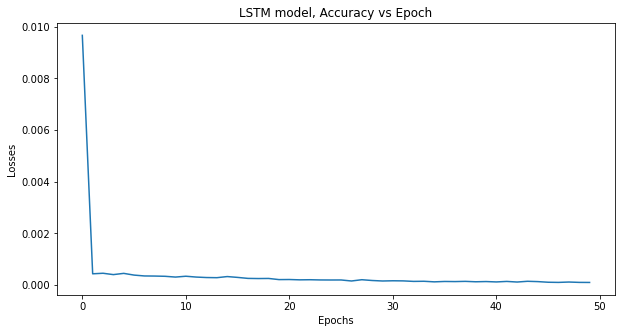

In [152]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 5s 24ms/step


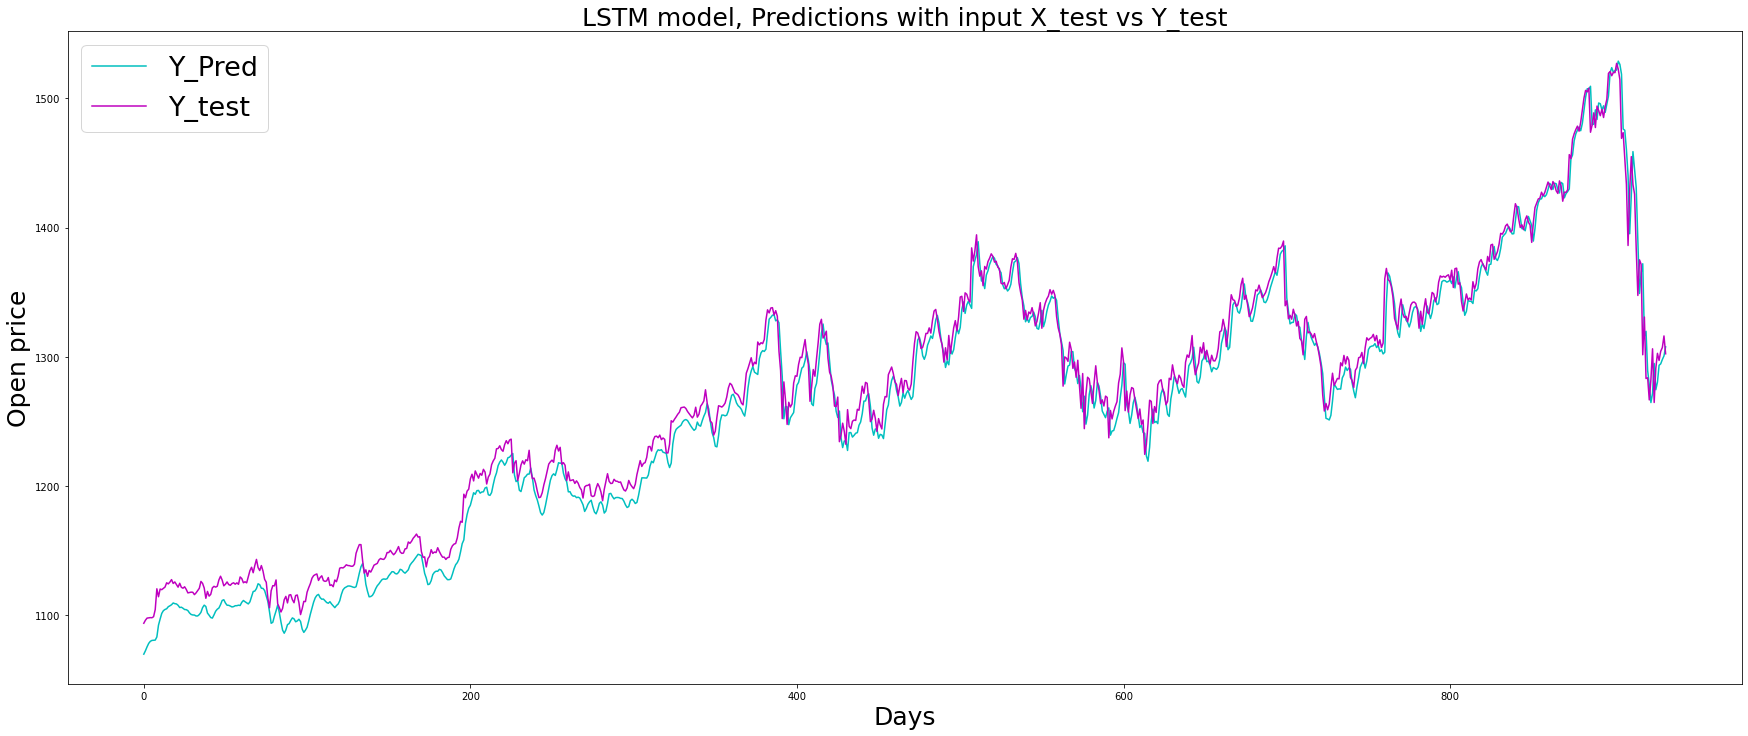

In [153]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [154]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 31ms/step
Simple RNN, Open price prediction       : 1121.74
LSTM prediction, Open price prediction  : 1122.124


In [171]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 70, batch_size = 30)

Epoch 1/70
97/97 [==============================] - 8s 25ms/step - loss: 0.0058 - accuracy: 6.8989e-04
Epoch 2/70
97/97 [==============================] - 2s 25ms/step - loss: 4.0419e-04 - accuracy: 6.8989e-04
Epoch 3/70
97/97 [==============================] - 2s 25ms/step - loss: 3.7673e-04 - accuracy: 6.8989e-04
Epoch 4/70
97/97 [==============================] - 2s 25ms/step - loss: 4.4078e-04 - accuracy: 6.8989e-04
Epoch 5/70
97/97 [==============================] - 3s 26ms/step - loss: 3.6691e-04 - accuracy: 6.8989e-04
Epoch 6/70
97/97 [==============================] - 3s 28ms/step - loss: 3.1874e-04 - accuracy: 6.8989e-04
Epoch 7/70
97/97 [==============================] - 3s 30ms/step - loss: 3.4295e-04 - accuracy: 6.8989e-04
Epoch 8/70
97/97 [==============================] - 3s 27ms/step - loss: 3.0287e-04 - accuracy: 6.8989e-04
Epoch 9/70
97/97 [==============================] - 3s 27ms/step - loss: 3.4560e-04 - accuracy: 6.8989e-04
Epoch 10/70
97/97 [======================

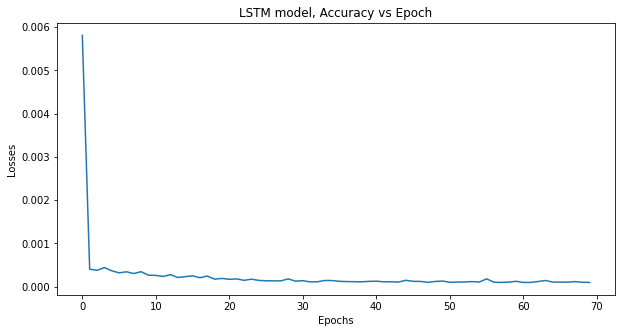

In [172]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 10ms/step


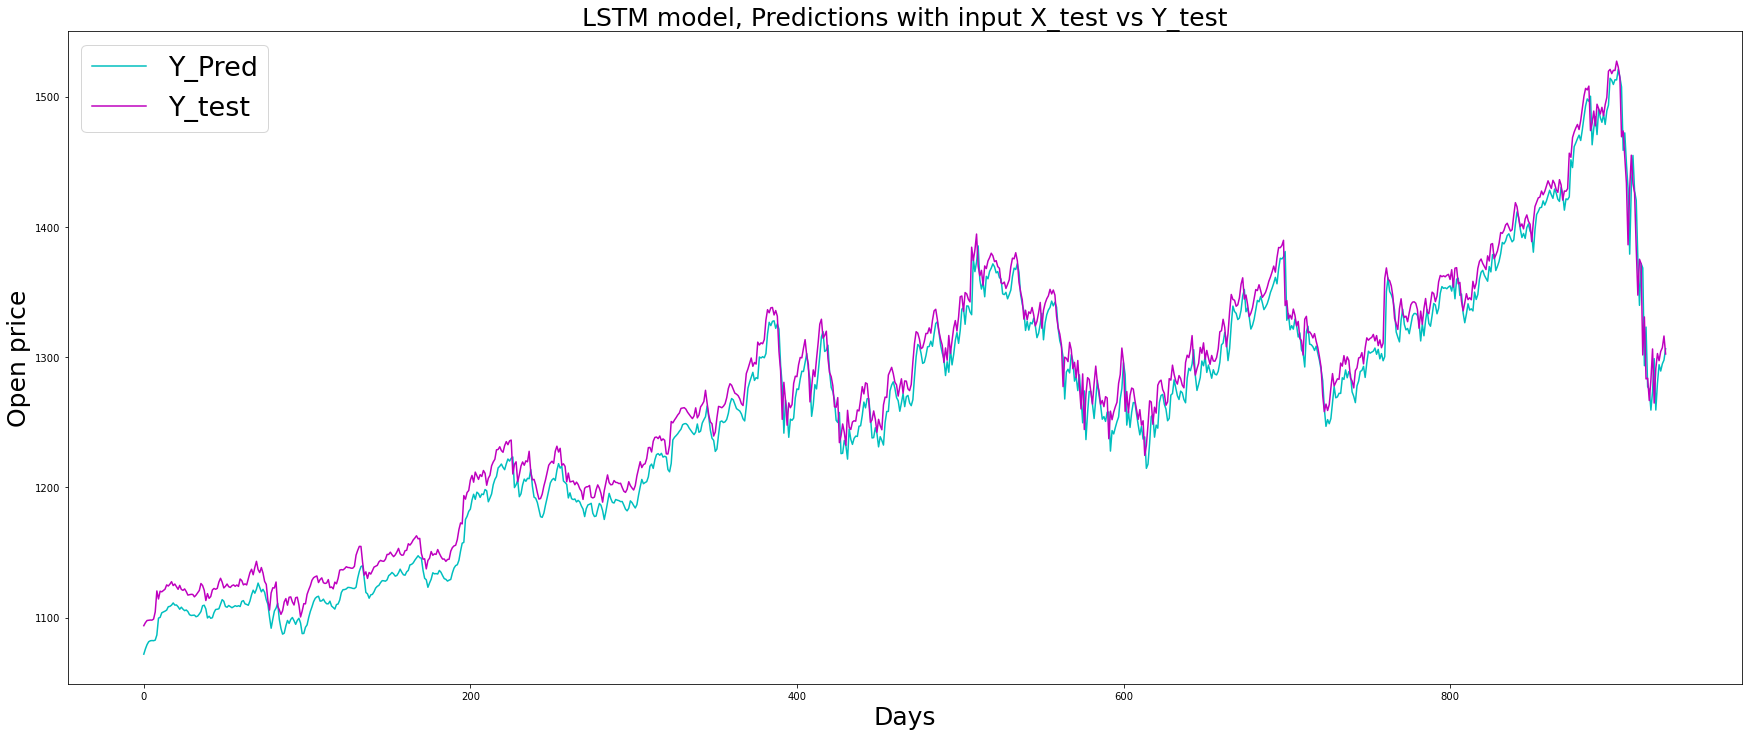

In [173]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [174]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 16ms/step
Simple RNN, Open price prediction       : 1121.74
LSTM prediction, Open price prediction  : 1116.3126


In [175]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 50, batch_size = 30)

Epoch 1/50
97/97 [==============================] - 4s 21ms/step - loss: 0.0063 - accuracy: 6.8989e-04
Epoch 2/50
97/97 [==============================] - 2s 22ms/step - loss: 4.0927e-04 - accuracy: 6.8989e-04
Epoch 3/50
97/97 [==============================] - 2s 21ms/step - loss: 3.9379e-04 - accuracy: 6.8989e-04
Epoch 4/50
97/97 [==============================] - 2s 21ms/step - loss: 3.7085e-04 - accuracy: 6.8989e-04
Epoch 5/50
97/97 [==============================] - 2s 21ms/step - loss: 3.6886e-04 - accuracy: 6.8989e-04
Epoch 6/50
97/97 [==============================] - 2s 22ms/step - loss: 3.6879e-04 - accuracy: 6.8989e-04
Epoch 7/50
97/97 [==============================] - 2s 22ms/step - loss: 3.5171e-04 - accuracy: 6.8989e-04
Epoch 8/50
97/97 [==============================] - 2s 21ms/step - loss: 3.4612e-04 - accuracy: 6.8989e-04
Epoch 9/50
97/97 [==============================] - 2s 23ms/step - loss: 3.0589e-04 - accuracy: 6.8989e-04
Epoch 10/50
97/97 [======================

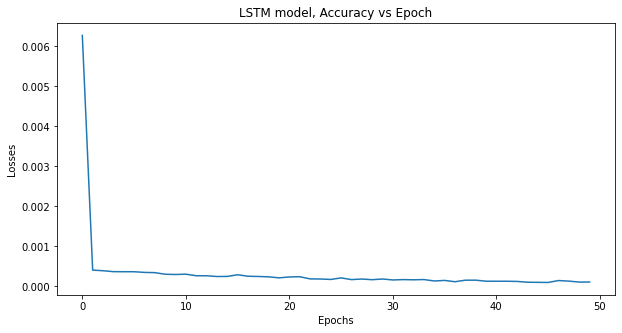

In [176]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 7ms/step


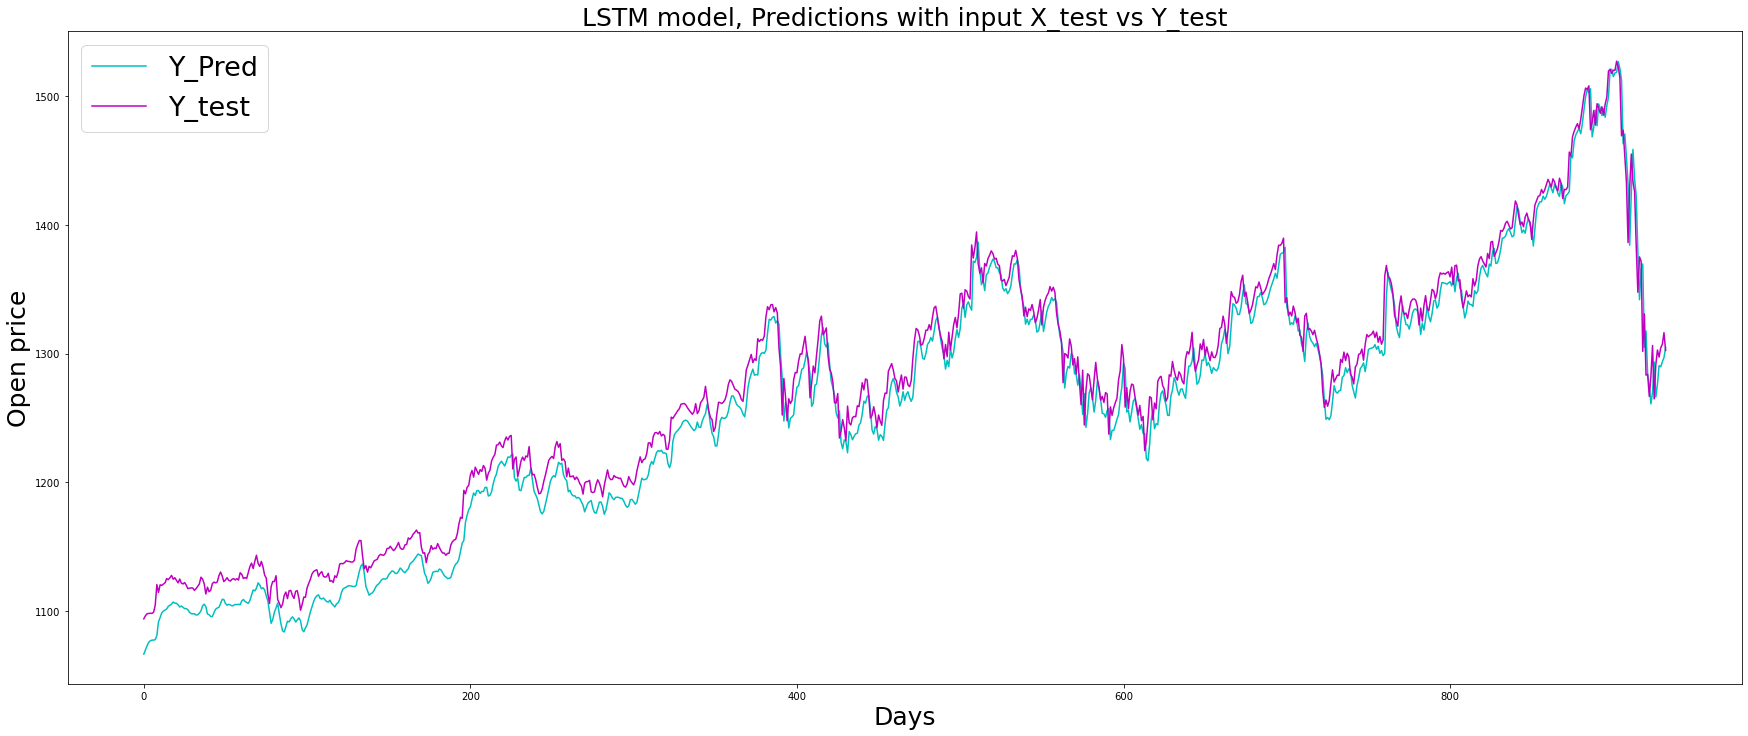

In [177]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [178]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 14ms/step
Simple RNN, Open price prediction       : 1121.74
LSTM prediction, Open price prediction  : 1115.1882


In [179]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 40, batch_size = 30)

Epoch 1/40
97/97 [==============================] - 4s 22ms/step - loss: 0.0079 - accuracy: 6.8989e-04
Epoch 2/40
97/97 [==============================] - 2s 22ms/step - loss: 4.0848e-04 - accuracy: 6.8989e-04
Epoch 3/40
97/97 [==============================] - 2s 21ms/step - loss: 4.2660e-04 - accuracy: 6.8989e-04
Epoch 4/40
97/97 [==============================] - 2s 21ms/step - loss: 3.9241e-04 - accuracy: 6.8989e-04
Epoch 5/40
97/97 [==============================] - 2s 21ms/step - loss: 3.8026e-04 - accuracy: 6.8989e-04
Epoch 6/40
97/97 [==============================] - 2s 21ms/step - loss: 3.5627e-04 - accuracy: 6.8989e-04
Epoch 7/40
97/97 [==============================] - 2s 20ms/step - loss: 3.1583e-04 - accuracy: 6.8989e-04
Epoch 8/40
97/97 [==============================] - 2s 21ms/step - loss: 3.8774e-04 - accuracy: 6.8989e-04
Epoch 9/40
97/97 [==============================] - 2s 20ms/step - loss: 3.0460e-04 - accuracy: 6.8989e-04
Epoch 10/40
97/97 [======================

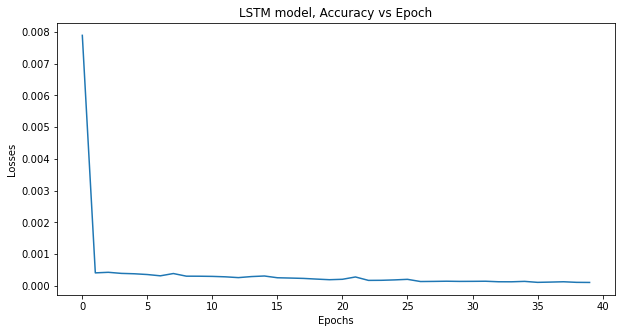

In [180]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 8ms/step


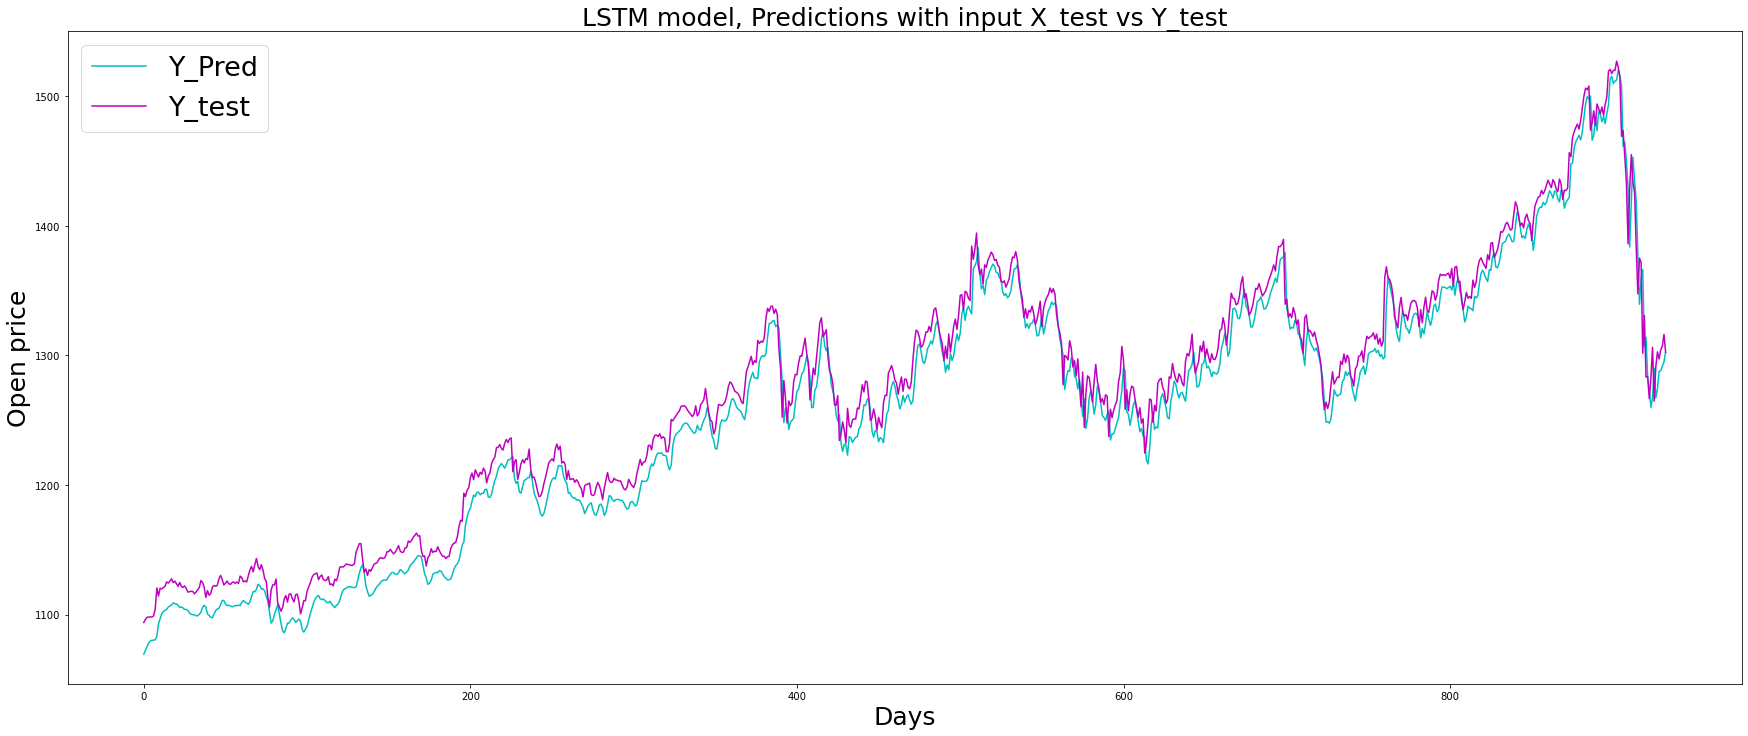

In [181]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [182]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 16ms/step
Simple RNN, Open price prediction       : 1121.74
LSTM prediction, Open price prediction  : 1118.0852


In [183]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(
    LSTM(64, return_sequences= False))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = lstm.fit(X_train, Y_train, epochs = 30, batch_size = 30)

Epoch 1/30
97/97 [==============================] - 6s 29ms/step - loss: 0.0101 - accuracy: 6.8989e-04
Epoch 2/30
97/97 [==============================] - 3s 31ms/step - loss: 3.9088e-04 - accuracy: 6.8989e-04
Epoch 3/30
97/97 [==============================] - 3s 29ms/step - loss: 3.6212e-04 - accuracy: 6.8989e-04
Epoch 4/30
97/97 [==============================] - 3s 28ms/step - loss: 3.5085e-04 - accuracy: 6.8989e-04
Epoch 5/30
97/97 [==============================] - 3s 29ms/step - loss: 3.5909e-04 - accuracy: 6.8989e-04
Epoch 6/30
97/97 [==============================] - 3s 29ms/step - loss: 3.5323e-04 - accuracy: 6.8989e-04
Epoch 7/30
97/97 [==============================] - 3s 27ms/step - loss: 3.4315e-04 - accuracy: 6.8989e-04
Epoch 8/30
97/97 [==============================] - 3s 30ms/step - loss: 3.2313e-04 - accuracy: 6.8989e-04
Epoch 9/30
97/97 [==============================] - 3s 30ms/step - loss: 3.0095e-04 - accuracy: 6.8989e-04
Epoch 10/30
97/97 [======================

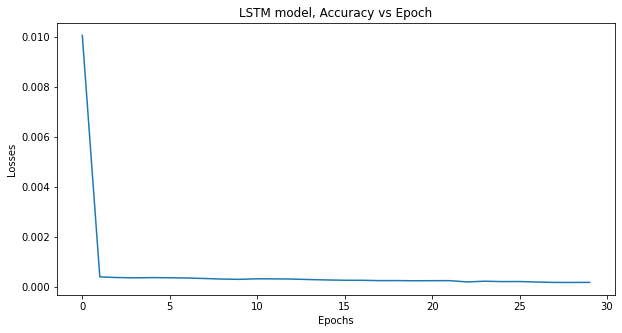

In [184]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 10ms/step


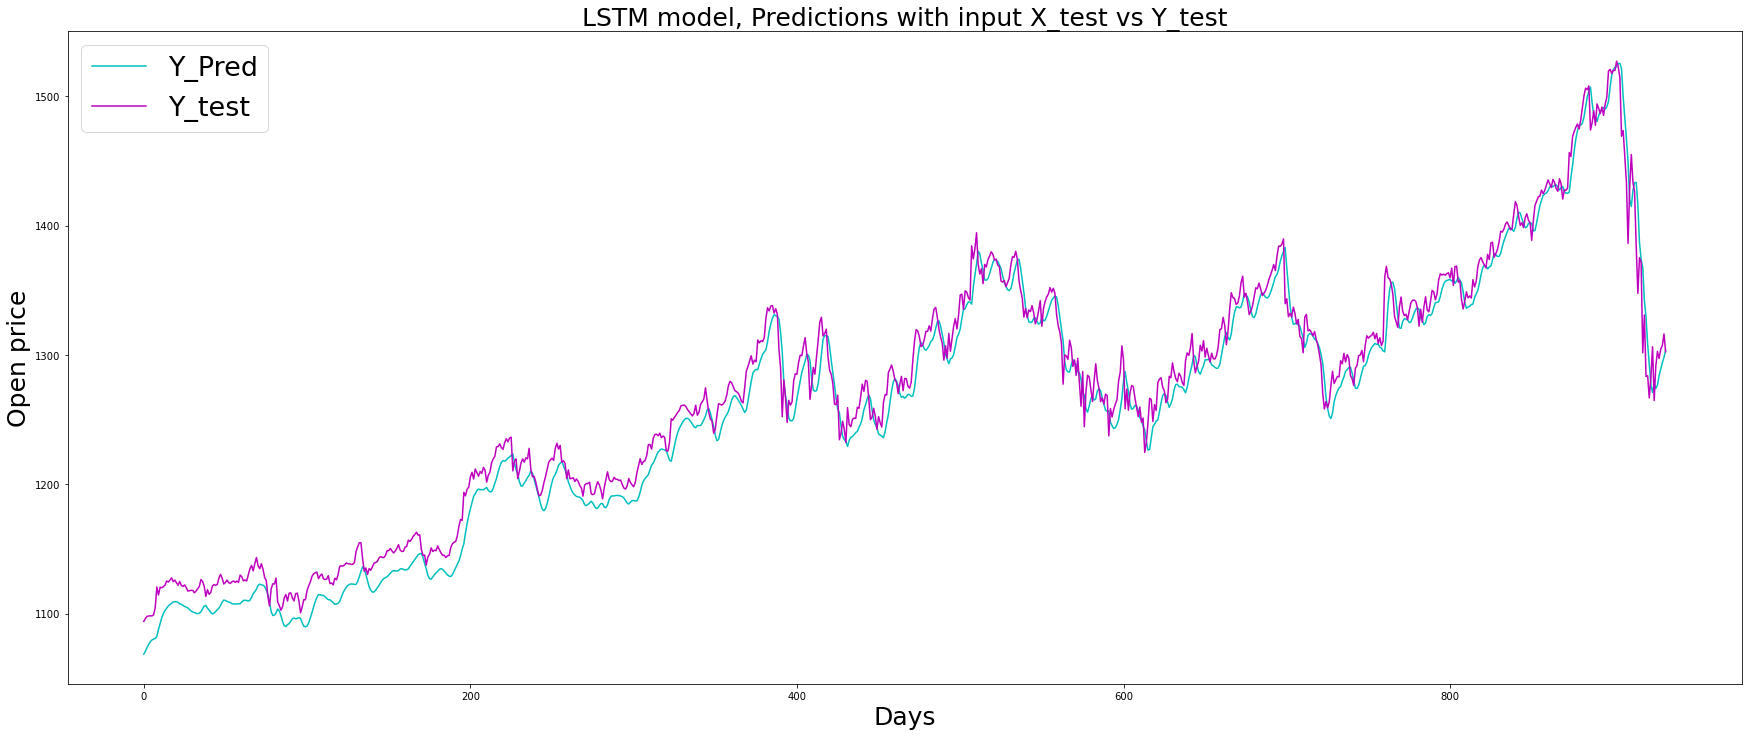

In [185]:
plt.subplots(figsize =(30,12))
plt.plot(sc.inverse_transform(lstm.predict(X_test)), label = "Y_Pred", c = "c",)
plt.plot(sc.inverse_transform(Y_test), label = "Y_test", color = "m")
plt.xlabel("Days",fontsize = 25)
plt.ylabel("Open price",fontsize = 25)
plt.title("LSTM model, Predictions with input X_test vs Y_test",fontsize = 25)
plt.legend(fontsize= 27)
plt.show()

In [186]:
RNN = sc.inverse_transform(regressor.predict(X_input))
LSTM = sc.inverse_transform(lstm.predict(X_input))
print("Simple RNN, Open price prediction       :", RNN[0,0])
print("LSTM prediction, Open price prediction  :", LSTM[0,0])

1/1 [==============================] - 0s 19ms/step
Simple RNN, Open price prediction       : 1121.74
LSTM prediction, Open price prediction  : 1120.2155
